# Part 1

## 1. Create a dataframe or tibble representing this dataset that has the desired properties.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Number of samples
n_samples = 800

In [2]:
# Creating the ID feature
ids = [f'ID{str(i).zfill(3)}' for i in range(n_samples)]

In [3]:
# Creating the Group feature
groups = np.random.choice(['A', 'B', 'C'], size=n_samples)

In [4]:
# Creating the Feature 1
feature_1_mean = 2500
feature_1_std = 300

feature_1 = np.random.normal(loc=feature_1_mean, scale=feature_1_std, size=n_samples)

In [5]:
# Creating Feature_2
feature_2_mean = 400
feature_2_std = 15
feature_2 = np.random.normal(loc=feature_2_mean, scale=feature_2_std, size=n_samples)

In [6]:
# Creating Feature_3 based on the Group
feature_3 = np.zeros(n_samples)
feature_3_std = 12

# Applying the formula for Feature_3 based on the Group
for i in range(n_samples):
    if groups[i] == 'A':
        feature_3[i] = 3 * feature_1[i] - 5 * feature_2[i]
    elif groups[i] == 'B':
        feature_3[i] = 2 * feature_1[i]
    elif groups[i] == 'C':
        feature_3[i] = -feature_1[i] + feature_2[i]

# Adding normally distributed noise to Feature_3
feature_3 += np.random.normal(loc=0, scale=feature_3_std, size=n_samples)

In [7]:
# Creating the DataFrame
data = pd.DataFrame({
    'ID': ids,
    'Group': groups,
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3
})

data.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID000,A,2231.898456,406.953096,4675.464934
1,ID001,B,2295.926912,403.577210,4598.450032
2,ID002,A,2558.261993,374.823337,5797.962027
3,ID003,B,2209.750781,388.574351,4421.316489
4,ID004,B,2820.477907,408.622785,5654.617634


### Confirming features were calculuated correctly

In [8]:
# Confirming the number of samples in each group
data.shape

(800, 5)

In [9]:
# Confirm that rougly 1/3 of the samples are in each group
group_counts = data['Group'].value_counts()

# Calculating the percentage of samples in each group
group_percentages = (group_counts / n_samples) * 100

print(f"Group A: {group_percentages['A']:.2f}% of the samples")
print(f"Group B: {group_percentages['B']:.2f}% of the samples")
print(f"Group C: {group_percentages['C']:.2f}% of the samples")

Group A: 33.38% of the samples
Group B: 33.50% of the samples
Group C: 33.12% of the samples


In [10]:
# Confirming the mean and standard deviation of Feature_1
print("The mean is:", data['Feature_1'].mean())

# Calculating the percentage of data in Feature_1 that falls between 2200 and 2800
within_range = data['Feature_1'].between(2200, 2800)
percentage_within_range = within_range.mean() * 100

print("The percentage of data in Feature_1 that falls between 2200 and 2800:", percentage_within_range)

The mean is: 2494.2558613774063
The percentage of data in Feature_1 that falls between 2200 and 2800: 67.875


In [11]:
# Confirm that the mean and standard deviation of Feature_2 are correct
print("The mean is:", data['Feature_2'].mean())
print("The standard deviation is:", data['Feature_2'].std())

The mean is: 399.9600934736985
The standard deviation is: 14.70541986031511


In [12]:
# Confirming feature_3 is correct

# Calculating the expected values of Feature_3 based on the group
expected_feature_3 = np.where(data['Group'] == 'A', 3 * data['Feature_1'] - 5 * data['Feature_2'],
                             np.where(data['Group'] == 'B', 2 * data['Feature_1'],
                                      -(data['Feature_1']) + data['Feature_2']))

# Calculating the differences
differences = data['Feature_3'] - expected_feature_3

# Grouping the differences by the Group feature
grouped_differences = data.groupby('Group').apply(lambda x: x['Feature_3'] - (np.where(x['Group'] == 'A', 
                                                                                       3 * x['Feature_1'] - 5 * x['Feature_2'],
                                                                                       np.where(x['Group'] == 'B', 
                                                                                                2 * x['Feature_1'],
                                                                                                -(x['Feature_1']) + x['Feature_2']))))

# Calculating mean and standard deviation of the differences for each group
mean_differences = grouped_differences.mean()
std_differences = grouped_differences.std()

print(f"Mean Differences by Group:", mean_differences)
print(f"Standard Deviation of Differences by Group:", std_differences)

Mean Differences by Group: -0.09327194623984354
Standard Deviation of Differences by Group: 11.784562412581069


## 2. Answer the following questions:

In [13]:
# a. Theoretical number of samples with Feature_1 > 3000
prob_greater_than_3000 = 1 - norm.cdf(3000, loc=feature_1_mean, scale=feature_1_std)
expected_samples_greater_than_3000 = prob_greater_than_3000 * n_samples

print(f"Expected number of samples with Feature_1 > 3000: {expected_samples_greater_than_3000.round()}")

Expected number of samples with Feature_1 > 3000: 38.0


In [14]:
# b. Actual number of samples with Feature_1 > 3000
actual_samples_greater_than_3000 = (data['Feature_1'] > 3000).sum()

print(f"Actual number of samples with Feature_1 > 3000: {actual_samples_greater_than_3000}")

Actual number of samples with Feature_1 > 3000: 34


In [15]:
# c. Grouped mean and standard deviation of Feature_3
grouped_feature_3_stats = data.groupby('Group')['Feature_3'].agg(['mean', 'std'])

print("\nGrouped Feature_3 statistics:\n", grouped_feature_3_stats)


Grouped Feature_3 statistics:
               mean         std
Group                         
A      5469.938833  930.027170
B      5004.077501  577.307357
C     -2090.622241  290.193469


## 3. Make a scatterplot of Feature_3 vs Feature_1.

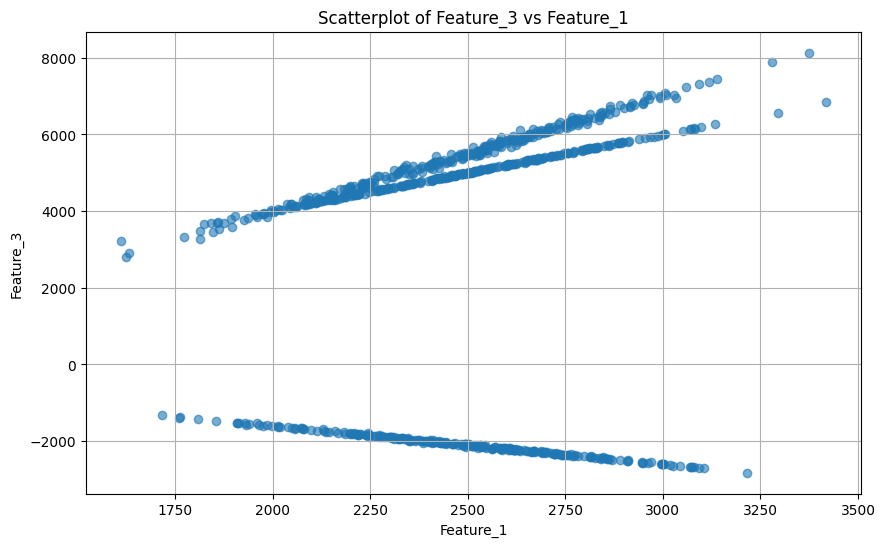

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature_1'], data['Feature_3'], alpha=0.6)
plt.title("Scatterplot of Feature_3 vs Feature_1")
plt.xlabel("Feature_1")
plt.ylabel("Feature_3")
plt.grid(True)
plt.show()

# 4. Saving the DataFrame to a CSV file

In [17]:
data.to_csv("/Users/giovanni-lunetta/uconn_masters/grad5100/Final_Project/Part_One/fake_data.csv", index=False)